# 5. Kvantizacija podatkov

(sec:enakomerno_casovno_vzorcenje)=
## Enakomerno časovno vzorčenje

Doslej smo obravnavali zvezne podatke $x(t)$, pri eksperimentalnem delu pa se skoraj vedno srečamo z diskretnimi vrednostmi, ki so tipično zajete z enakomernim časovnim vzorčenjem $x(n\,\Delta t)$, kjer je $\Delta t$ **čas (perioda) vzorčenja** ($f_s=1/\Delta t$ je **frekvenca vzorčenja**). 

Pri razumevanju vzorčenih podatkov si pomagamo z *enakomerno vzorčenimi podatki* $x_s(t)$, ki so produkt zveznih podatkov $x(t)$ in vlaka impulzov $i(t)$:

$$
x_s(t)=x(t)\,i(t),
$$

kjer je:

$$
i(t)= \sum_{n=-\infty}^{+\infty}\delta(t-n\,\Delta t)
$$

Fourierova transformacija $x_s(t)$ je:

$$
\begin{split}
X_s(f)&=\int_{-\infty}^{+\infty} x(t)\,\sum_{n=-\infty}^{+\infty}\delta(t-n\,\Delta t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,t}\,\textrm{d} t,\\
&=\sum_{n=-\infty}^{+\infty}\,\int_{-\infty}^{+\infty} x(t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,t}\,\delta(t-n\,\Delta t)\,\textrm{d} t,\\
&=\sum_{n=-\infty}^{+\infty}\,x(n\,\Delta t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,n\,\Delta t}.
\end{split}
$$

Pri prehodu v zadnjo vrstico uporabimo sejalno lastnost Diracove delta funkcije (glejte {ref}`sec:dirac_lastnosti`).

Ključna posledica zgornje izpeljave je: **za vzorčene podatke se integral preoblikuje v vsoto po vzorčenih vrednostih** (pomnoženih s harmonsko modulacijo).

Fourierova transformacija enakomerno vzorčene vrste $X_s(f)$ se ponavlja (je periodična) s frekvenco $1/\Delta t$, to dokažemo tako:

$$
\begin{split}
X_s(f+r/\Delta t)&=\sum_{n=-\infty}^{+\infty}\,x(n\,\Delta t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,(f+r/\Delta t)\,n\,\Delta t},\\
&=\sum_{n=-\infty}^{+\infty}\,x(n\,\Delta t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,n\,\Delta t}\,\underbrace{\mathrm{e}^{-\textrm{i}\,2\pi\,r\,n}}_{=1},\\
&=\sum_{n=-\infty}^{+\infty}\,x(n\,\Delta t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,n\,\Delta t},\\
&=X_s(f),
\end{split}
$$

kjer je $r$ poljubno celo število. Sklenemo torej:

:::{note}

**Fourierova transformacija** podatkov $x(t)$, vzorčenih s periodo $\Delta t$, je definirana kot vsota:

$$
X_s(f)=\sum_{n=-\infty}^{+\infty}\,x(n\,\Delta t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,n\,\Delta t}
$$

in je v frekvenčni domeni periodična s frekvenco $1/\Delta t$:

$$
X_s(f)=X_s(f+r/\Delta t), \qquad \textrm{kjer je:}\quad r\in \mathbb{Z}.
$$

:::


Poskusimo sedaj izpeljati inverzno Fourierovo transformacijo; najprej izraz v frekvenčni domeni pomnožimo z $\mathrm{e}^{\textrm{i}\,2\pi\,f\,p\,\Delta t}$ (pri tem je $p\,\Delta t$ čas, pri katerem nas zanima vrednost v času $x(p\,\Delta t)$) in integriramo po frekvenci $f$:

$$
\int_{-1/2\Delta t}^{+1/2\Delta t}\,X_s(f)\,\mathrm{e}^{\textrm{i}\,2\pi\,f\,p\,\Delta t}\,\textrm{d}f=\int_{-1/2\Delta t}^{+1/2\Delta t}\,\sum_{n=-\infty}^{+\infty}\,x(n\,\Delta t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,f\,n\,\Delta t}\,\mathrm{e}^{\textrm{i}\,2\pi\,f\,p\,\Delta t}\,\textrm{d}f,
$$

kjer smo integrirali samo po eni periodi v frekvenci (po več ne bi bilo smiselno, saj je $X_s(f)$ periodična funkcija).

Zgornji izraz preoblikujemo v:

$$
\sum_{n=-\infty}^{+\infty}\,x(n\,\Delta t)\,\int_{-1/2\Delta t}^{+1/2\Delta t}\,\underbrace{\mathrm{e}^{-\textrm{i}\,2\pi\,f\,(n-p)\,\Delta t}}_{=1,\textrm{ ko je } n=p\quad\textrm{sicer je integral izraza: }0}\,\textrm{d}f=x(p\,\Delta t)\,\frac{1}{\Delta t}.
$$


:::{note}

Izpeljali smo torej **inverzno Fourierovo transformacijo**:

$$
x(p\,\Delta t) = \Delta t\,\int_{-1/2\Delta t}^{+1/2\Delta t}\,X_s(f)\,\mathrm{e}^{\textrm{i}\,2\pi\,f\,p\,\Delta t}\,\textrm{d}f
$$

:::

## Frekvenčno prekrivanje

Frekvenčno prekrivanje ali tudi frekvenčno zrcaljenje (ang. *aliasing*) je pojav, pri katerem pride do napačne identifikacije frekvence v signalu, razlog pa je neprimerno vzorčenje časovnega signala. Poglejmo detajle: vlak impulzov $i(t)$ lahko vidimo kot periodične podatke s periodo $\Delta t$ ter jih popišemo s Fourierovo vrsto:

$$
i(t)= \sum_{n=-\infty}^{+\infty}\delta(t-n\,\Delta t) = \sum_{n=-\infty}^{+\infty}c_n\,\mathrm{e}^{\textrm{i}\,2\pi\,n\,t/\Delta t},
$$

kjer je:

$$
c_n=\frac{1}{\Delta t}\,\int_{-\Delta t/2}^{+\Delta t/2}i(t)\,\mathrm{e}^{-\textrm{i}\,2\pi\,n\,t/\Delta t}\,\textrm{d}t=\frac{1}{\Delta t}.
$$

Sledi:

$$
i(t)= \frac{1}{\Delta t}\, \sum_{n=-\infty}^{+\infty}\mathrm{e}^{\textrm{i}\,2\pi\,n\,t/\Delta t}.
$$



Fourierova transformacija $i(t)$, definiranega s pomočjo Forierovih vrst:

$$
\begin{split}
I(f)&= \int_{-\infty}^{+\infty}\Big(\frac{1}{\Delta t}\, \sum_{n=-\infty}^{+\infty}\mathrm{e}^{\textrm{i}\,2\pi\,n\,t/\Delta t}\Big)\, \mathrm{e}^{-\textrm{i}\,2\pi\,f\,t}\,\textrm{d}t,\\
&= \frac{1}{\Delta t}\, \sum_{n=-\infty}^{+\infty}\int_{-\infty}^{+\infty}
\mathrm{e}^{\textrm{i}\,2\pi\,n\,t/\Delta t}\, \mathrm{e}^{-\textrm{i}\,2\pi\,f\,t}\,\textrm{d}t,\\
&= \frac{1}{\Delta t}\, \sum_{n=-\infty}^{+\infty}\int_{-\infty}^{+\infty}
\mathrm{e}^{-\textrm{i}\,2\pi\,(f-n/\Delta t)\,t}\,\textrm{d}t,\\
&= \frac{1}{\Delta t}\, \sum_{n=-\infty}^{+\infty}
\delta\Big(f-\frac{n}{\Delta t}\Big).\\
\end{split}
$$

Zgoraj smo uporabli lastnost Diracove delta funkcije $\int_{-\infty}^{+\infty}\mathrm{e}^{\pm\textrm{i}\,2\,\pi\,a\,t}\,\textrm{d}t= \delta(a)$ (glejte {ref}`sec:dirac_lastnosti`). Fourierova tranformacija $i(t)$ je torej v frekvenčni domeni periodično ponavljajoča s frekvenčno periodo $1/\Delta t$.

Poglejmo si sedaj povezavo $X(f)$ in $X_s(f)$:

$$
\begin{split}
X_s(f) =\mathcal{F}(i(t)\,x(t)) &= I(f)*X(f)\\
&=\int_{-\infty}^{+\infty}I(p)\,X(f-p)\,\textrm{d}p\\
&=\int_{-\infty}^{+\infty}\frac{1}{\Delta t}\, \sum_{n=-\infty}^{+\infty}
\delta\Big(p-\frac{n}{\Delta t}\Big)\,X(f-p)\,\textrm{d}p\\
&=\frac{1}{\Delta t}\,\sum_{n=-\infty}^{+\infty}\,\underbrace{\int_{-\infty}^{+\infty}\,
\delta\Big(p-\frac{n}{\Delta t}\Big)\,X(f-p)\,\textrm{d}p}_{\textrm{Sejalna lastnost pri $p=n/\Delta t$}}\\
&=\frac{1}{\Delta t}\,\sum_{n=-\infty}^{+\infty}\,X\Big(f-\frac{n}{\Delta t}\Big)\\
\end{split}
$$

Kako interpretiramo zgornjo izpeljavo? Če imamo časovno vzorčene podakte $x_s(t)$, kar vodi v frekvenčni domeni do $X_s(f)$, imamo pri določeni frekvenci $f$ vsebnost vsote zveznih podatkov $X(f)$ pri frekvencah $f-n/\Delta t$, kjer gre celo število $n$ od $-\infty$ do $+\infty$. V praksi to pomeni, da se nam vsebnost dejanskega (zveznega) signala iz frekvenčnega področja izven področja $[-1/2\Delta t, +1/2\Delta t]$ zrcali in prekriva v frekvenčno področje od $[-1/2\Delta t, +1/2\Delta t]$; glejte zgled spodaj.

### Zgled: Gaussov impulz

Časovno vzorčenje in frekvenčno prekrivanje si bomo tukaj pogledali na primeru Gaussovega impulza/okna (glejte {ref}`sec:gaussov_impulz`), ki je v časovni in frekvenčni domeni definirano kot:

$$
x(t) = \mathrm{e}^{-a\,t^2},\quad X(f)=\sqrt{\frac{\pi}{a}}\, \mathrm{e}^{-\pi^{2}\,f^{2}/a};\qquad a>0 
$$

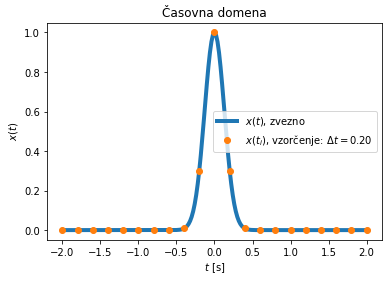

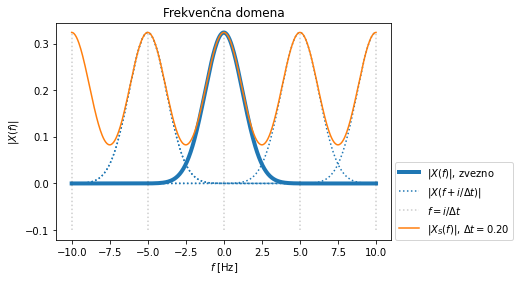

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# navodilo: spreminaj parameter `a`

t, f = sym.symbols('t, f', real=True)
n, Δt = sym.symbols('n, Δt')
a = sym.symbols('a', real=True, positive=True)
x = sym.exp(-a*t**2)
X = sym.fourier_transform(x, t, f)
Xsum = sym.Sum(X.subs(f, f-n/Δt), (n, -10, 10))

podatki = {a: 30, Δt: .2}
# pripravimo vektorizirane funkcije za numpy
f_x = sym.lambdify(t, x.subs(podatki), 'numpy')
f_X_abs = sym.lambdify(f, sym.Abs(X.subs(podatki)), 'numpy')
f_Xsum_abs = sym.lambdify(f, sym.Abs(Xsum.subs(podatki)), 'numpy')

# zaloga vrednosti v času in frekvenci (t_g so 'gosti' podatki za prikaz zvezne funkcije)
N = int(2/podatki[Δt]) # približno število -N, da imamo časovni trak cca [-2,2]
t_g = np.arange(-10*N,10*N+1)*podatki[Δt]/10
n = np.arange(-N,N+1)
t_i = n*podatki[Δt]
K = 2 # koliko sosednijih preslikav X(f) prikažemo
fr = np.linspace(-K/podatki[Δt],K/podatki[Δt], num=500)

plt.title('Časovna domena')
plt.plot(t_g, f_x(t_g), 'C0', label='$x(t)$, zvezno', linewidth=4)
plt.plot(t_i, f_x(t_i), color='C1', marker='o', ls='', label=f'$x(t_i)$, vzorčenje: $\\Delta t=${podatki[Δt]:3.2f}')
plt.xlabel('$t$ [s]')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

plt.title('Frekvenčna domena')
plt.plot(fr, f_X_abs(fr), 'C0', label='$|X(f)|$, zvezno', linewidth=4)
for i in range(-K,K):
    plt.plot(fr, f_X_abs(fr+i/podatki[Δt]), 'C0', ls=':')
    plt.vlines(i/podatki[Δt], -0.1, np.max(f_X_abs(fr)), 'k', ls=':', alpha=0.2)
plt.plot(fr, f_X_abs(fr+i/podatki[Δt]), 'C0', ls=':', label='$|X(f+i/\Delta t)|$')
plt.vlines((i+1)/podatki[Δt], -0.1, np.max(f_X_abs(fr)), 'k', ls=':', alpha=0.2, label='$f=i/\Delta t$')
plt.plot(fr, f_Xsum_abs(fr), color='C1', label=f'$|X_S(f)|$, $\\Delta t=${podatki[Δt]:3.2f}')
plt.xlabel('$f$ [Hz]')
plt.ylabel('$|X(f)|$')
plt.legend(loc=(1.01,0))
plt.show()

Še en primer frekvenčnega prekrivanja predstavlja spodnji zgled, kjer obravnavamo harmonske podatke. Ko je frekvenca vzorčenja `fs`, glede na frekvenco harmonskih podatov `f`, prenizka ($f>fs/2$), se dejanska frekvenca zrcali v frekvenčno področje do `fs/2`. V spodnji kodi frekvenco sinusnega signala `f` poskusite počasi dvigovati proti (in nad) frekvenco vzorčenja `fs`.

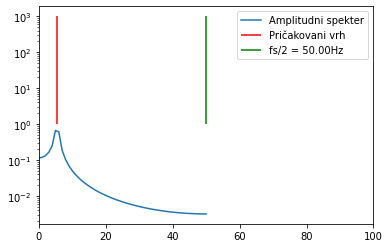

In [2]:
import matplotlib.pyplot as plt
import numpy as np

f = 5.5 # <<<<<<<<<<<<<<<<
T = 1.
N = 100
t, dt = np.linspace(-T/2, T/2, N, endpoint=False, retstep=True)
fs = 1/dt
x = np.cos(2*f*np.pi*t+0.33)

X1=np.fft.rfft(x)*2/len(x)

f1=np.fft.rfftfreq(len(x),dt)
plt.semilogy(f1, np.abs(X1), label='Amplitudni spekter');
plt.vlines(f, 1, 1000, 'r', label='Pričakovani vrh')
plt.vlines(fs/2, 1, 1000, 'g', label=f'fs/2 = {fs/2:3.2f}Hz')
plt.xlim(0, fs/2+50)
plt.legend();

## Preprečevanje frekvenčnega prekrivanja

Če je $f_s=1/\Delta t$ frekvenca vzorčenja, potem se frekvenčnemu prekrivanju lahko izognemo tako, da uporabimo **nizko-pasovni** (ang. *low-pass*) filter na frekvenci:

$$
f_{np}<\frac{f_s}{2}.
$$

Pri tem je pomembno, da se uporabi analogni filter, *preden* se izvede časovno vzorčenje. Frekvenci $f_{np}$ rečemo tudi [Nyquistova frekvenca](https://en.wikipedia.org/wiki/Nyquist_frequency). 

## Kvantizacija podatkov: pretvorba zveznih podatkov v diskretne

Za obdelavo v računalnikih moramo merjene zvezne podatke pretvoriti v diskretne numerične vrednosti, zajete z določeno frekvenco vzorčenja. Zajemne kartice danes omogočajo relativno hitro zajemanje (vsaj 100 kHz) pri relativno veliki dinamični globini (vsaj 24 bit). Tukaj si bomo bolj podrobno pogledali dinamično globino, ki predstavlja število diskretnih nivojev, na kateri zajemna kartica razpozna analogne podatke.



Zapis števil v računalniku je končne natančnosti, tipično današnji računalniki uporabljajo 64 bitno natančnost zapisa, kar je bistveno več kakor pa je natančnost zajemnih merilnih kartic. 

Poglejmo si naslednji zgled, kjer obravnavamo sinusoido. Če uporabimo 24 bitno kartico in tipično območje merjenja [-10, 10], je razlika med dvema nivojema kvantizacije približno 1e-6, ker je za večino meritev povsem dovolj. Razmerje med najmanjšo in največjo vrednostjo, ki jo lahko na določeni zajemin kartici merimo, imenujemo **dinamični razpon** ali tudi **dinamična globina**.

V kolikor pa uporabljamo sistem z nižjim dinamičnim razponom, pa je treba biti na območje merjenja v povezavi z dinamičnim razponom zelo pozoren in morebiti ojačati merjene podatke. Takšen primer je sinusoida spodaj, ki jo kvantiziramo na dveh območjih ([-1, 1] in [-5, 5]) s 4 bitno natančnostjo (16 nivojev)

Pri merjenju je treba paziti tudi na **porezane podatke** (ang. *clipping*), ko je območje merjenja premajhno (primer spodaj: [-0.5, 0.5]).

Opomba: koda za spodnjo sliko vključuje tudi primer, ko nam šum lahko pomaga, da izmerimo veličine, ki so manjše od nivoja kvantizacije.

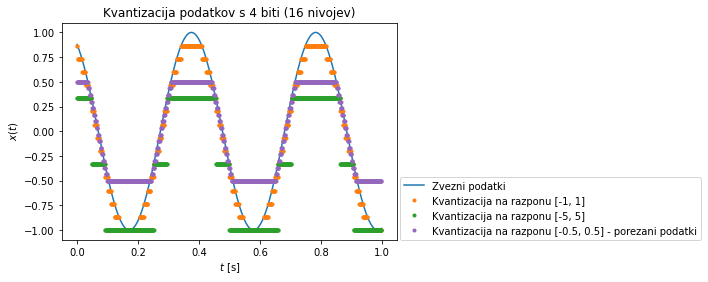

In [3]:
import matplotlib.pyplot as plt
import numpy as np

T = 1
N = 1000
fr = 2.452
t, dt = np.linspace(0, T, N, endpoint=False, retstep=True)
angle = 0.5
x = 1*np.cos(2*np.pi*fr*t+angle)
# Ta primer prikaže kako lahko nakčjučni šum pomaga, da izmerimo nekaj kar je pod nivojem kvantizacije
#x = 0.03*np.cos(2*np.pi*fr*t+angle)
#x = x+.2*(np.random.rand(N)-0.5)

def get_quantized(x, bits = 4, adc_range = (-2, 2)):
    x2 = x.copy()
    lo, hi = adc_range
    x2[x<=lo] = lo
    x2[x>=hi] = hi
    delta = (hi - lo) / (2**(bits)-1)
    qnt = lo+delta*np.floor((x2-lo)/delta)
    return qnt

bits = 4
levels = 2**bits
x2 = get_quantized(x, bits = bits, adc_range=(-1, 1))
x3 = get_quantized(x, bits = bits, adc_range=(-5, 5))
x4 = get_quantized(x, bits = bits, adc_range=(-.5, .5))

plt.title(f'Kvantizacija podatkov s {bits} biti ({levels} nivojev)')
plt.plot(t, x, 'C0', label='Zvezni podatki')
plt.plot(t, x2, 'C1', marker='.', linestyle='', label=f'Kvantizacija na razponu [-1, 1]')
plt.plot(t, x3, 'C2', marker='.', linestyle='', label=f'Kvantizacija na razponu [-5, 5]')
plt.plot(t, x4, 'C4', marker='.', linestyle='', label=f'Kvantizacija na razponu [-0.5, 0.5] - porezani podatki')
plt.xlabel('$t$ [s]')
plt.ylabel('$x(t)$')
plt.legend(loc=(1.01,0))
plt.show()

## Razmerje med signalom in šumom 

Razliko med kvantizirano in dejansko vrednostjo lahko obravnavamo kot naključni šum $e$ z enakomerno porazdelitvijo znotraj koraka kvantizacije. Standardna deviacija takega šuma je definirana kot ({cite:t}`shin2008`, str: 133):

$$
\sigma_e=\frac{A/2^b}{\sqrt{12}},
$$

kjer je $A$ celotni razpon območja kvantizacije in je $b$ število bitov kvantizacije, brez bita za predznak. Pri 24 bitni kvantizaciji na območju od -10 do 10 ($A=20$) je standardna deviacija šuma:

$$
\sigma_e = \frac{20/2^{23}}{\sqrt{12}}=6.88\cdot 10^{-7},
$$

Da vrednotimo delež koristnih informacij proti šumu, si pomagamo z:

:::{note}

Razmerjem med signalom in šumom (ang. *signal-to-noise ratio*):

$$
\textrm{SNR}=10\log_{10}\Big(\frac{\sigma_x^2}{\sigma_e^2}\Big),
$$

kjer $\sigma_x^2$ in $\sigma_e^2$ predstavljata moč koristnih informacij (*signal* $x$) in šuma ($e$). 

:::

Če predpostavimo, da je $\sigma_x=A/4$ (da preprečimo rezanje podatkov), izpeljemo:

$$
\textrm{SNR}=10\log_{10}\Big(\frac{(A/4)^2}{\big(\frac{A/2^b}{\sqrt{12}}\big)^2}\Big)=
10\log_{10}\big(3/4\cdot 2^{2b}\big)\approx -1.25+6\,b\,\textrm{dB},
$$

V primeru 12 bitne kvantizacije je $b=11$ in imamo na voljo približno 65 dB dinamičnega razpona, v primeru 24 bitne kvantizacije pa bi bil teoretični razpon približno 137 dB. V praksi imamo opravka še z drugimi viri šuma, ki vodijo v to, da so vrednosti SNR bistveno nižje. Spodaj je prikazan idealizirani primer šuma in podatkov, ki niso obremenjeni s šumom.

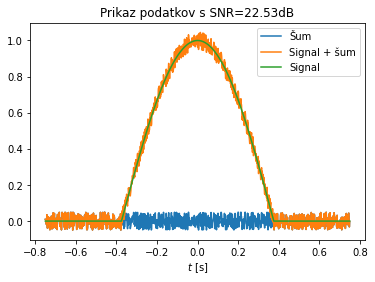

In [4]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

T = 1.5
N = 1000
w = 0.5
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(2*np.pi*t/(2*w*T))
x[np.logical_or(-w*T*0.5 > t , t > w*T*0.5)] = 0.
n = 0.1*(np.random.rand(N)-0.5)

plt.title(f'Prikaz podatkov s SNR={10*np.log10(np.std(x)**2/np.std(n)**2):3.2f}dB')
plt.plot(t, n, label='Šum')
plt.plot(t, x+n, label='Signal + šum')
plt.plot(t, x, label='Signal')
plt.xlabel('$t$ [s]')
plt.legend()
plt.show()